In [241]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [4]:
# read iris data
df = pd.read_csv('iris.data', header = None, encoding='utf-8')

# define columns
df.columns = ['sepal length in cm', 
              'sepal width in cm', 
              'petal length in cm',
              'petal width in cm' ,
              'class label']

# delete missing values (NaN values)
df.dropna(how="all", inplace=True)

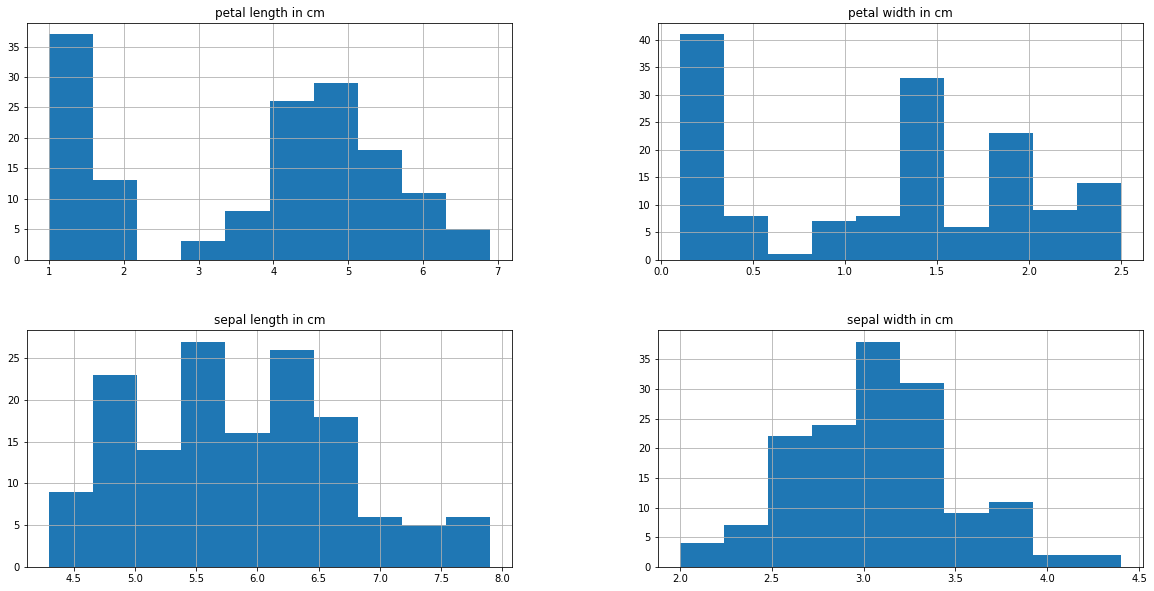

In [5]:
# generate histogram and save into a file

df.hist(figsize=(20, 10), alpha = 1)
#plt.savefig('iris_histogram.png')
plt.show()

In [88]:
# separate variables from class to train
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:, 4].values

# LDA
sklearn_lda = LDA(n_components = 2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

# set integers as classes identifier
le = preprocessing.LabelEncoder()
le.fit(y)
t = le.transform(y)

d = dict(zip(t,y))
print(d)

# generate a new dataframe of the training data
ds = pd.DataFrame(X_lda_sklearn)
ds['class label'] = y
ds.columns = ['LDA1', 'LDA2', 'class label']

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


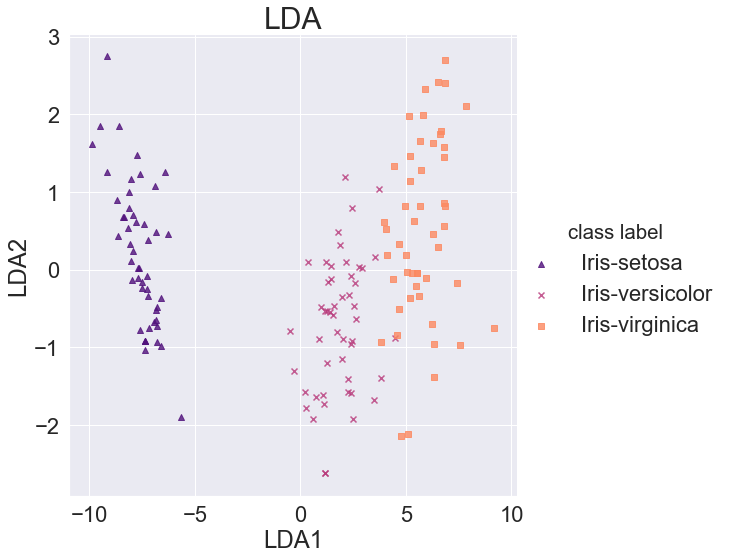

In [171]:
# plot lda data

#plt.figure(figsize=(10,8))
sns.set(font_scale=2)

markers = ['^', 'x','s']
sns.lmplot(x = 'LDA1', y = 'LDA2', data = ds, hue = 'class label', 
           markers = markers, palette='magma', fit_reg = False, legend=True, height = 8)

plt.title('LDA', fontsize = 30)
plt.show()


In [255]:
# preparing data for pca

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

ss = preprocessing.StandardScaler()
ss.fit(X)
X_pca = ss.transform(X)

pca_2d = PCA(n_components=2)
pca_2d.fit(X_pca)
Y_pca = pca_2d.transform(X_pca)

#df_pca_2d = pd.DataFrame(Y_pca)
#df_pca_2d.columns = ['PCA1', 'PCA2']

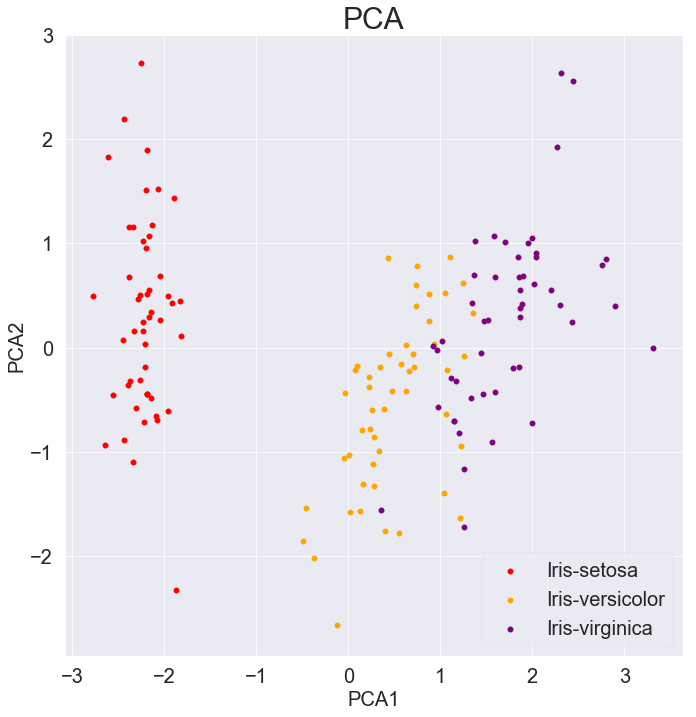

In [260]:
# plot pca data

with plt.style.context('seaborn-paper'):
    
    plt.figure(figsize=(10, 10))
    
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('red', 'orange', 'purple')):
        plt.scatter(Y_pca[y==lab, 0], Y_pca[y==lab, 1], label=lab, c=col)
        
    plt.xlabel('PCA1', fontsize = 20)
    plt.ylabel('PCA2', fontsize = 20)
    plt.legend(loc='lower right', fontsize = 20)
    plt.tight_layout()
    plt.title('PCA', fontsize = 30)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.show()